# 深度学习在人脸识别中的应用

人脸识别的过程包括：

1. 人脸检测
2. 人脸对齐
3. 特征提取
4. 特征度量

其中，特征提取与度量，是人脸识别问题中的关键问题，也是相关研究的难点之一。

## 传统方法在人脸识别中的弱点

传统人脸识别方法，主要利用了手工特征对面部信息进行归纳提取，将人脸图像变换到新的空间进行辨识比对。

而实际场景中人脸的多样性(妆容、光照、角度、配饰、表情、年龄变化等)信息，导致了手工特征无法稳健地获取人脸识别的特征。

对此，传统方法的解决方案多为对图像进行预处理，包括去噪、白平衡、人脸对齐等等，但由于特征的表达能力较弱，因此性能较为受限。

## 人脸识别在深度学习中是一个什么问题？

首先，CNN的经典模型，如Resnet，VGG等，是一个典型的分类模型。

例如，手写数字识别问题中，共60000张训练图像，和10个类别。

用这些图像，将模型训练为一个十分类的问题。

然而，这种模型适合用于人脸识别吗？

**人脸识别在分类问题中的局限性**

在实际场景中，人脸识别往往不能作为一个分类问题看待。

其中主要原因是，我们很难为每个人都采集足够多的训练图像作为训练(可以用视频采集[1])

而且，即便我们为每个人都采集了大量的训练图像，也很难训练一个大规模的分类模型--因为类别太多了，特征空间太拥挤。

以CelebA为例，该数据集和mnist的对比如下

| 数据集 | mnist | CelebA |
| ---- | ---- | ---- |
| 类别 | 10   | 10,177   |
| 单类图像数量 | 6,000 |  |
|    单类图像数量最大        | 6,000 | 73 |
| 单类图像数量最小 | 6,000 | 2 |

显然，这样的数据集不足以支撑我们用分类模型训练一个分类器。

**实际场景中的人脸识别问题**

实际场景中的人脸识别，通常有两个场景

1. 人脸验证, 1v1, 手机解锁
2. 人脸识别, 1vN, 打卡签到

无论哪个场景，都需要进行一个步骤，即人脸的两两匹配。

因此，归根结底，人脸识别都是一个特征匹配的问题。

而我们需要准确的提取人脸图像的特征，令其类内距离尽可能地小，类间距离尽可能地大。

问题在于：在无法充分训练CNN的前提下，如何利用它得到一个精确的特征提取器？



## 人脸识别在深度学习中的第一个里程碑--DeepFace[2]

deepface是2014年facebook出品，首次在人脸识别领域中取得了超越人类的性能。

**模型结构**

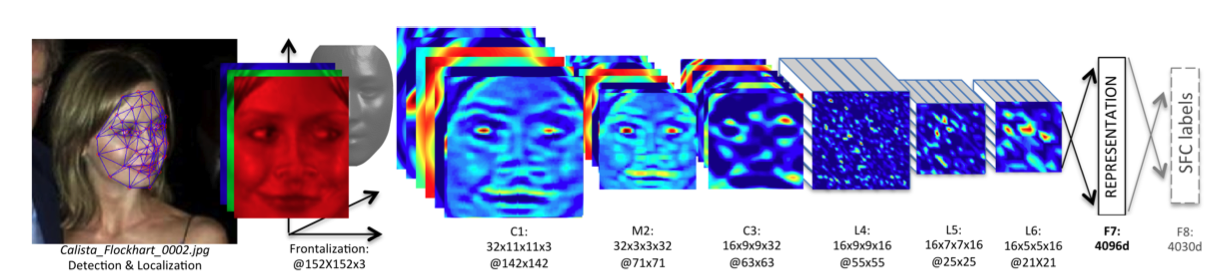

该工作具有典型的早期CNN的研究风格，采用分类的思路来训练模型

使用的数据集为SFC(social face classification)，共440万张图像，4030个类别，每个人都有800至1200张图像。

这样的数据集足够训练一个CNN模型(一百万级参数)

**人脸对齐**

除了训练模型之外，他还采用了人脸对齐的方案，具体过程如下：

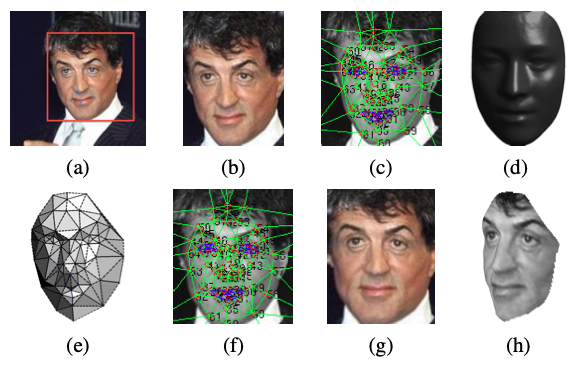


**Step1.** 人脸检测

采用LBP+SVR来检测出人脸。其中，SVR是一种回归算法，通过LBP特征的输入，来训练一个SVR模型，用于估计人脸检测结果。

其中SVR的原理与SVM大致相同，优化思想都是离超平面最近的点到该超平面的距离最大。

不同的在于，SVR是一个回归模型，优化目标额外增加了超平面与数据之间的误差最小

**Step2.** 人脸对齐

* 迭代6个点

先对上述求得的六个基准点进行迭代，找到精确的六个点

* 找到67个点

使用第二个SVR，定位出人脸的67个基准点

* 基于67个点，进行Delaunay三角化进行编号

具体来说，给定一个点集，Delaunay三角剖分算法会生成一个相应的三角形网格，其中每个三角形的外接圆内不包含任何点。

* 人脸3d映射

编号后，通过一个平均3d人脸，得到一个当前人脸对于3D人脸的映射，并根据三角剖分获得3d人脸三角网

* 角度偏转

将3d人脸三角网偏转至正面，以获得正向人脸。最终降维到2d空间，得到人脸正视图。



**人脸验证**

针对人脸验证场景，输入两个实例，判断他们是否为同一个人。

其中，采用无监督的方式，就可以直接对提取到的特征做内积。

这种方法也是CNN早期作为特征提取器使用的主要方式之一。

而有监督的方式则是可采用训练的方式，将特征映射到新的空间，让**类间距离变大，类内距离变小**

具体论文中，提到了两种方式：

1. 卡方相似度

$$\chi^2(f_1, f_2)=\sum_i w_i\frac{(f_1 - f_2)^2}{f_1 + f_2}$$

上述公式利用卡方分布，构建了一个分类器：给定特征$f_1, f2$, 分类器会输出一个分类值。

用SVM训练得到$w_i$，如果输出正例，则为同类。

2. 孪生网络

上述模型两路参数共享，将输出的特征映射为一个逻辑单元

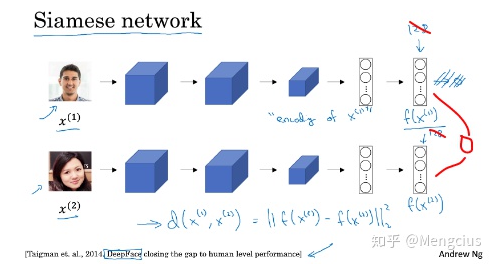

**实验结果**

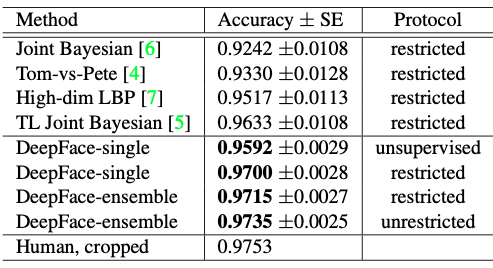

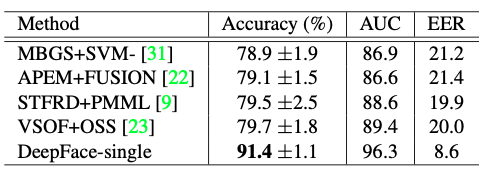

## 现代人脸识别研究的主要趋势

现代人脸识别问题，主要的核心在于如何将不同的人脸，在特征空间中有效区分开来。

例如，利用siamese network，就是一种典型的度量学习策略。

这种度量学习，通常采用对比损失作为损失函数，其目标是判断输入的两个实例，是/不是一类。

**虽然这种方式能够将类间距离加大，但对于类内距离的减小，作用有限。**

对此，人们又提出了三元组损失。

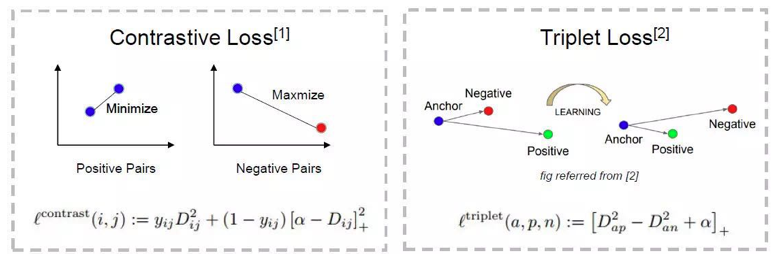

三元组损失函数可以在加大类间距离的同时，拉近类内距离。因此，获得了较好的结果[3]。

在google提出的FaceNet中，人脸识别的准确率在LFW上，达到了98.87/%， 如果使用了额外的对齐手段，准确率还能继续提升一个点。

然而，加入三元组损失的问题在于模型训练成本增加。

解决方案包括：先用常规训练得到基本模型，然后再用三元组进行fine tuning，或者是改变simple的方式，把一些较难辨识的类别特殊处理等等。

#### 参考文献

1. Zhou, Erjin, Zhimin Cao, and Qi Yin. "Naive-deep face recognition: Touching the limit of LFW benchmark or not?." arXiv preprint arXiv:1501.04690 (2015).
2. 
3. Schroff, Florian, Dmitry Kalenichenko, and James Philbin. "Facenet: A unified embedding for face recognition and clustering." Proceedings of the IEEE conference on computer vision and pattern recognition. 2015.


**备注：deepface经过多年迭代，已经可以实现多种人脸相关的内容，并且封装成了成熟的工具。**[地址](https://github.com/serengil/deepface)